In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [2]:
dataset = pd.read_csv("winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Data preprocessing including visualization

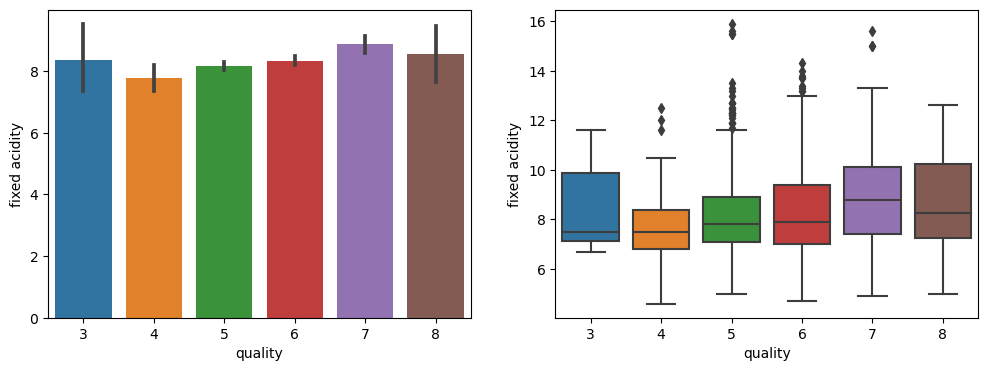

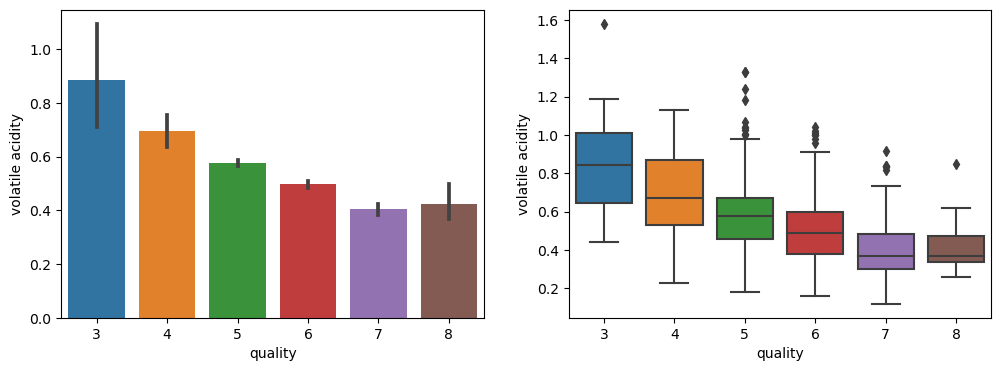

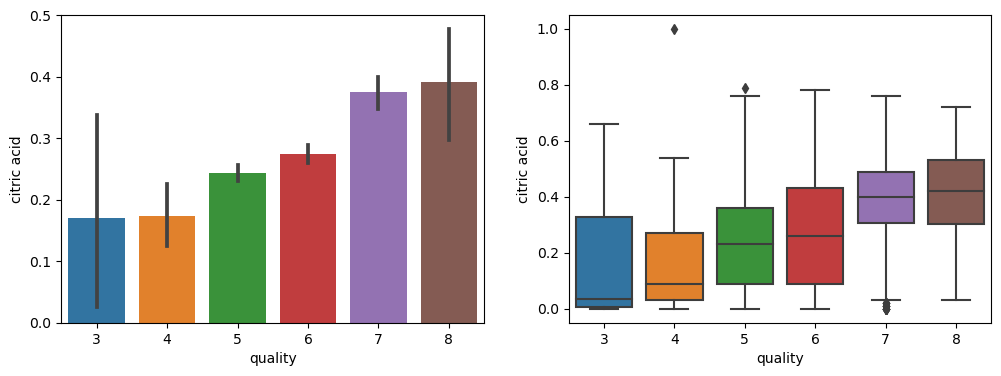

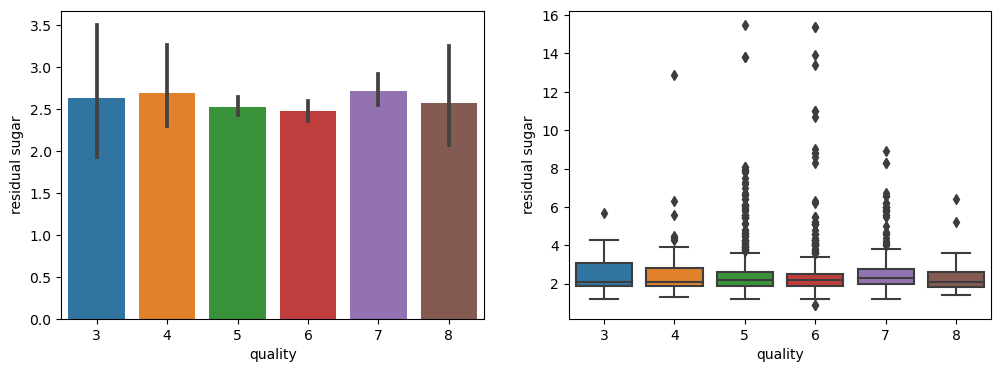

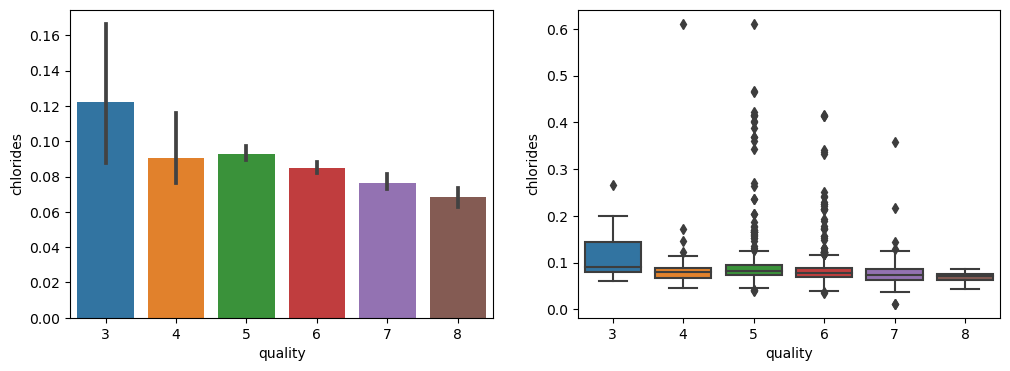

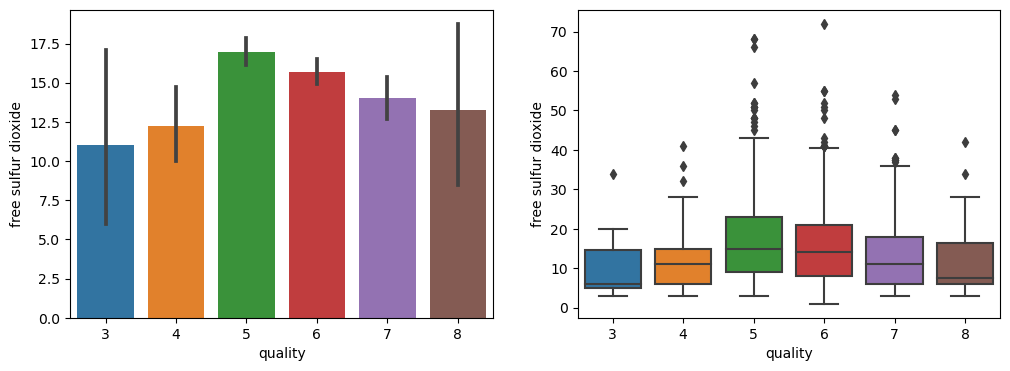

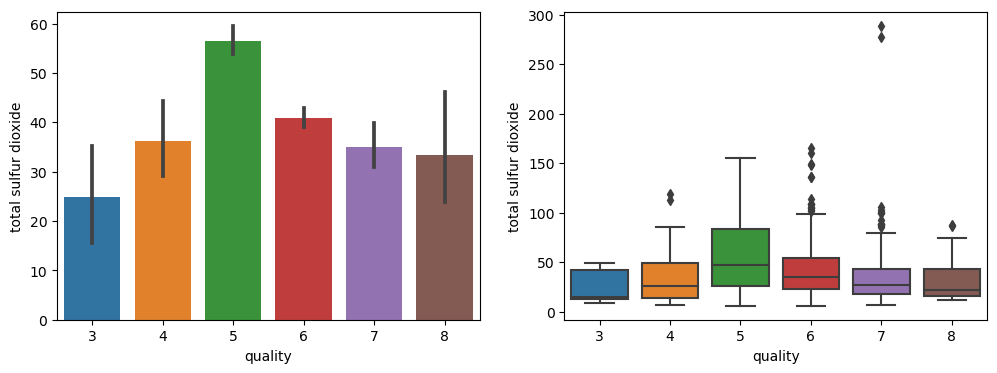

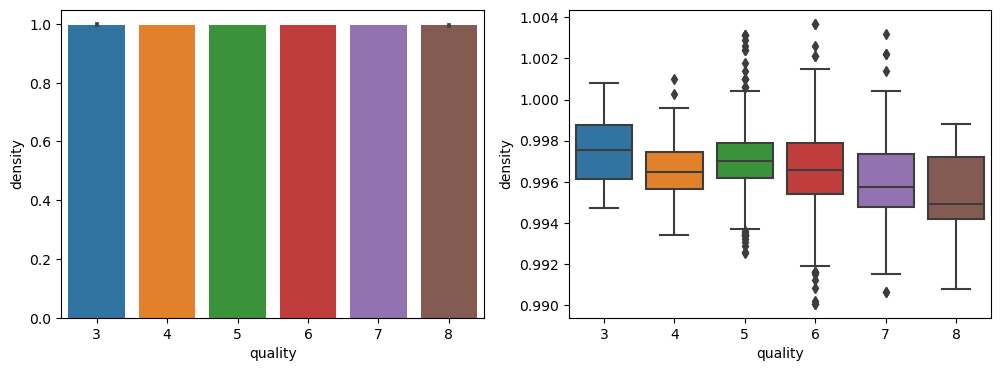

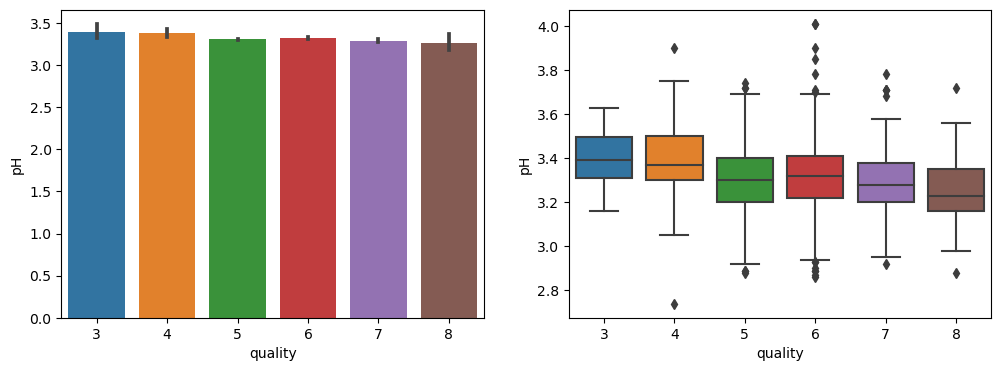

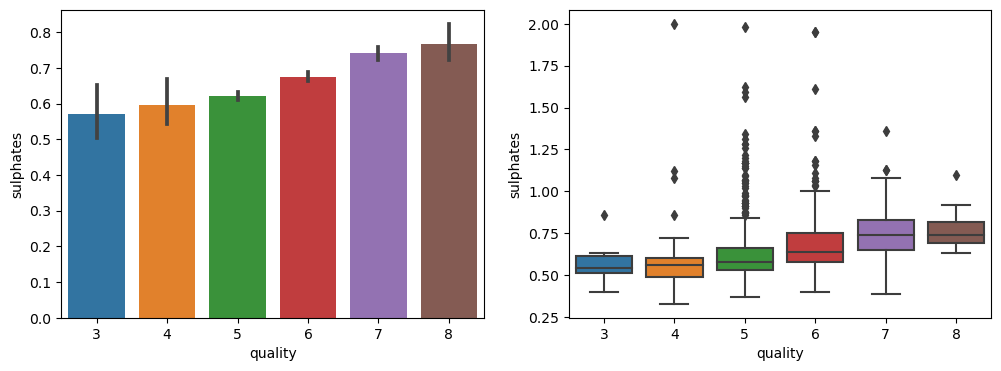

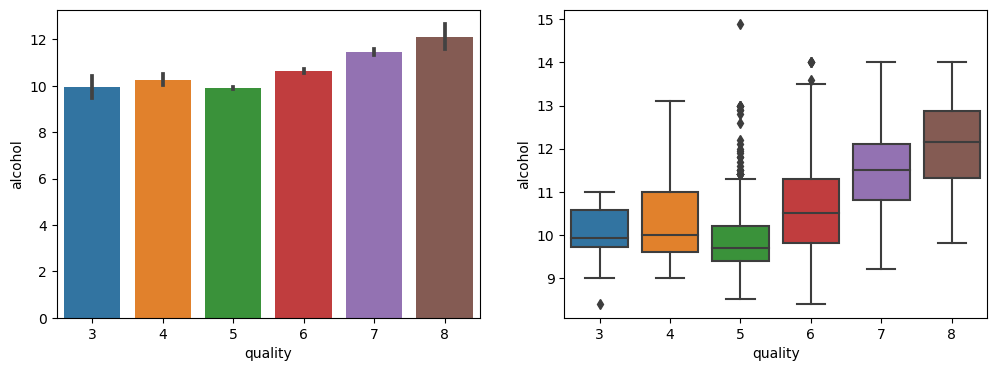

In [9]:
# quality-wise distribution of parameter values
for col in dataset.columns[:-1]:
    plt.figure(col, figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.barplot(x='quality', y=col, data=dataset)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='quality', y=col, data=dataset)

<Axes: >

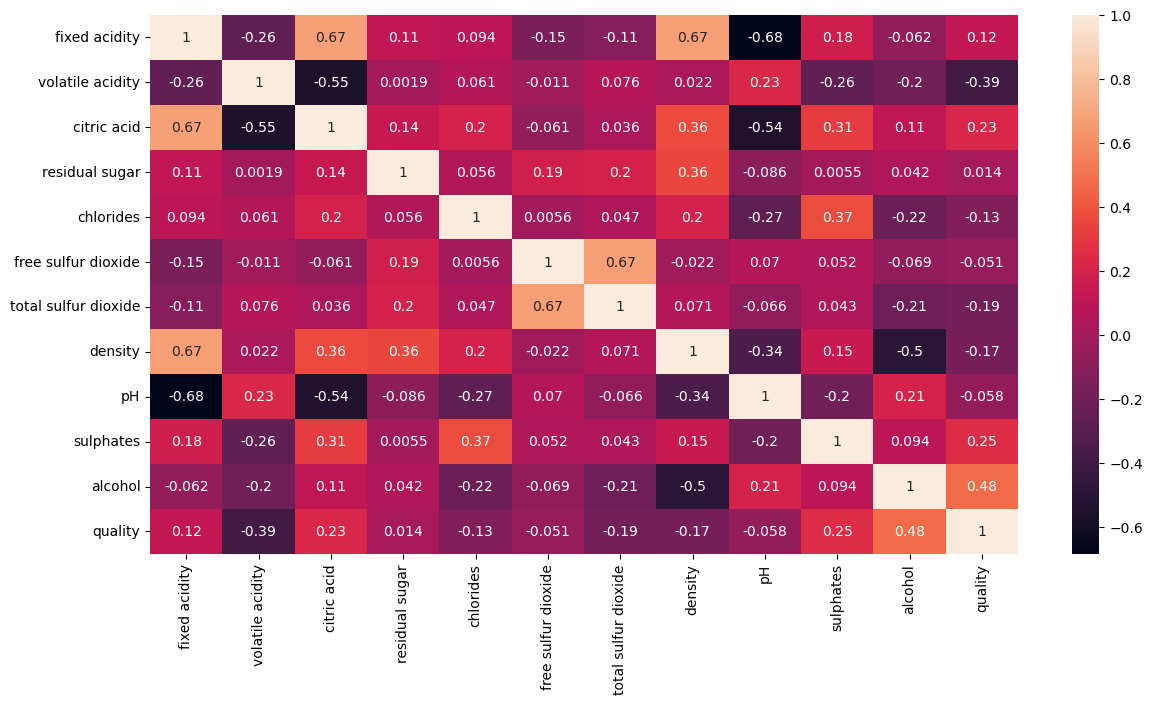

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(), annot=True)

In [11]:
x, y = dataset.drop('quality', axis=1), dataset['quality']
x.shape, y.shape

((1599, 11), (1599,))

In [12]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_res, y_res = os.fit_resample(x, y) 

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((3064, 11), (1022, 11), (3064,), (1022,))

In [20]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

### Machine Learning Model building

In [25]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.8622715404699739

### Evaluate the model

In [27]:
from sklearn.metrics import accuracy_score

pred = classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.7407045009784736


### Test with random observation

In [29]:
classifier.predict([[7.38, 0.72, 0.01, 1.88, 0.075, 10.9, 33.7, 0.9764, 3.48, 0.52, 9.6], 
                   [7.358, 0.72, 0.01, 1.88, 0.075, 10.9, 33.7, 0.9764, 3.48, 0.52, 9.6],
                   [6.38, 2.72, 1.01, 7.88, 1.075, 15.9, 25.7, 1.0764, 3.98, 0.12, 9.0]])

array([7, 7, 7], dtype=int64)